# #Load libs and dataset

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
plt.style.use('seaborn-v0_8-whitegrid')

df = pd.read_csv('Mall_Customers.csv')


# # Pré-processamento e Análise Inicial

In [53]:

print("Primeiras 5 linhas do dataset:")
print(df.head())

print("\nInformações sobre o dataset:")
df.info()

print("\nVerificando valores nulos:")
print(df.isnull().sum())

print("\nRenomeando colunas para facilitar o acesso:")
df.rename(columns={'Genre': 'Gender', 'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)': 'Spending_Score'}, inplace=True)
print(df.head())

print("\nEstatísticas descritivas:")
print(df.describe())


Primeiras 5 linhas do dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Informações sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9

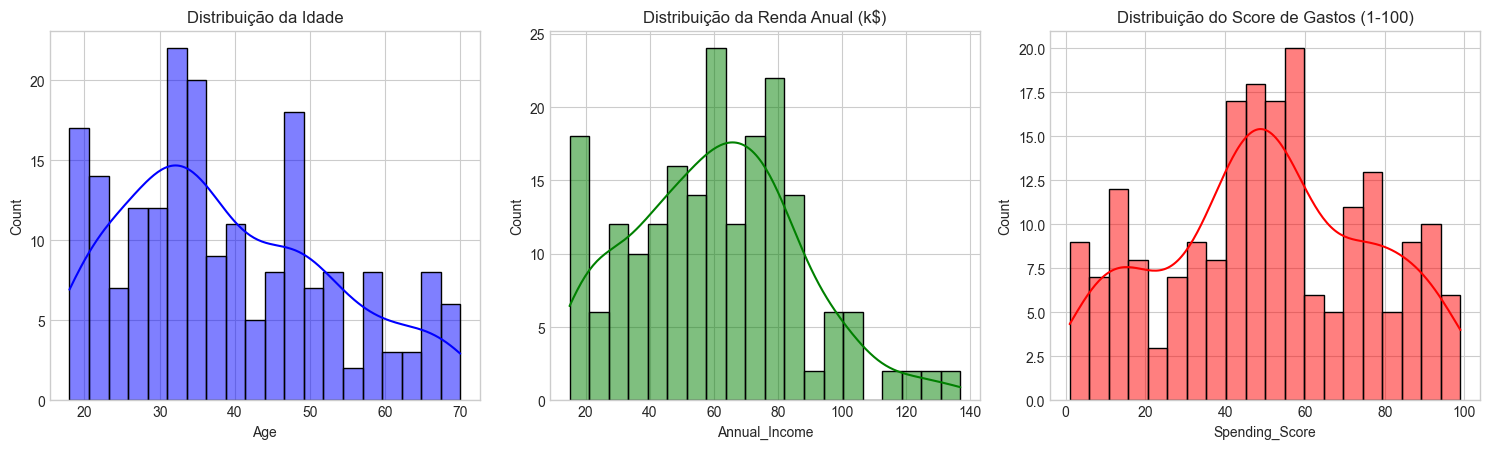

In [54]:
# Histogramas
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title('Distribuição da Idade')
plt.subplot(1, 3, 2)
sns.histplot(df['Annual_Income'], bins=20, kde=True, color='green')
plt.title('Distribuição da Renda Anual (k$)')
plt.subplot(1, 3, 3)
sns.histplot(df['Spending_Score'], bins=20, kde=True, color='red')
plt.title('Distribuição do Score de Gastos (1-100)')
plt.suptitle('Histogramas das Variáveis Numéricas', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


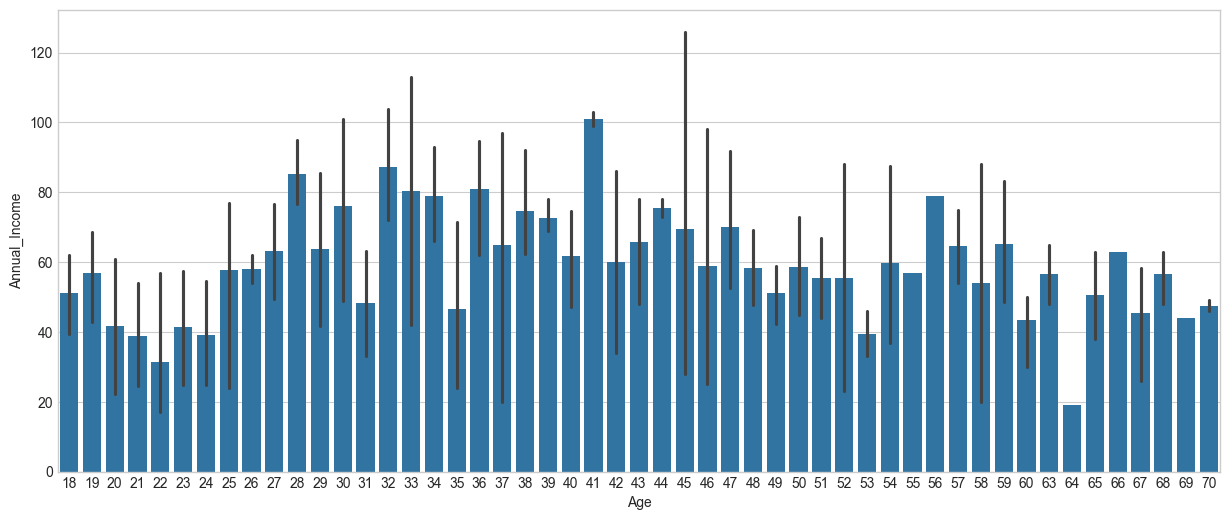

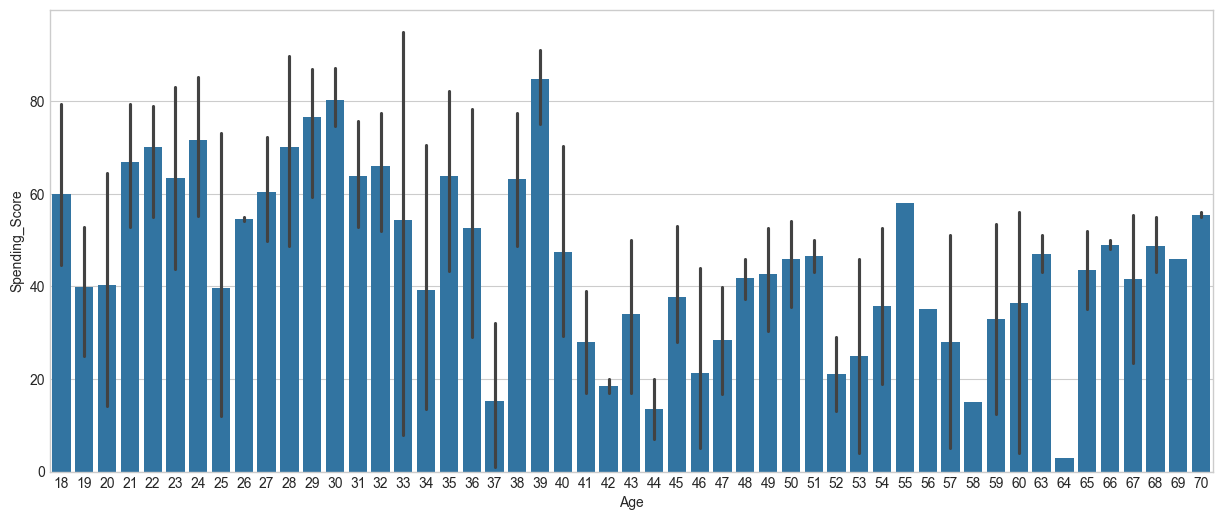

In [55]:
#Barplot de renda por idade
plt.figure(figsize=(15,6))
sns.barplot(df,x=df['Age'],y=df['Annual_Income'])
plt.title('Idade x Renda Anual')
plt.show()

#Barplot de gasto por idade
plt.figure(figsize=(15,6))
sns.barplot(df,x=df['Age'],y=df['Spending_Score'])
plt.title('Idade x Gastos')
plt.show()


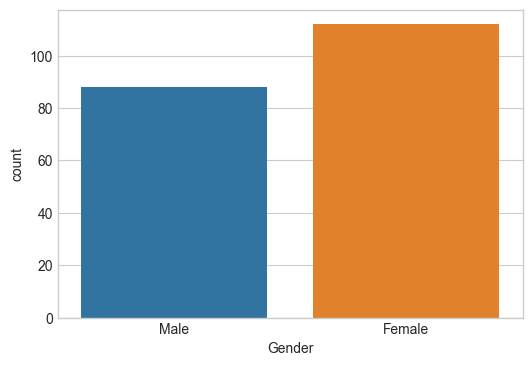

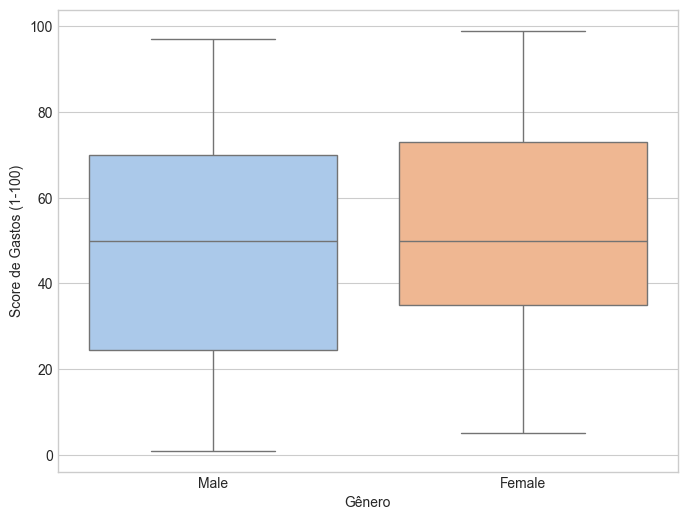

   Gender  Spending_Score
0  Female           51.53
1    Male           48.51


In [56]:
# Gráfico de Contagem para Gênero
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, hue='Gender', legend=False)
plt.title('Distribuição por Gênero')
plt.show()

# Gasto por Gênero
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='Spending_Score', palette='pastel', hue='Gender', legend=False)
plt.title('Comparação do Score de Gastos por Gênero', fontsize=16)
plt.xlabel('Gênero')
plt.ylabel('Score de Gastos (1-100)')
plt.show()

# Calcula a média do score de gastos por gênero
gender_spending = df.groupby('Gender')['Spending_Score'].mean().round(2).reset_index()
print(gender_spending)


Contagem de gênero ANTES do balanceamento:
Gender
Female    112
Male       88
Name: count, dtype: int64
------------------------------
Contagem de gênero DEPOIS do balanceamento:
Gender
Female    88
Male      88
Name: count, dtype: int64
------------------------------


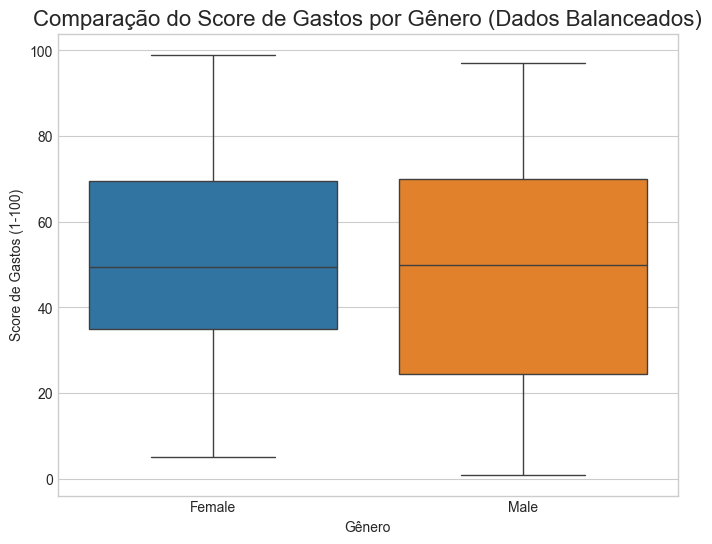

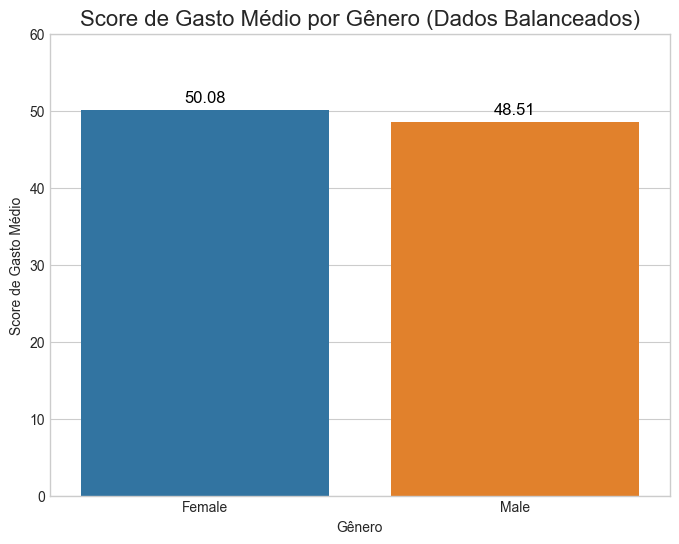


Médias de gastos com dados balanceados:
   Gender  Spending_Score
0  Female           50.08
1    Male           48.51


In [ ]:
# --- Balanceamento dos Dados com RandomUnderSampler ---

print("Contagem de gênero ANTES do balanceamento:")
print(df['Gender'].value_counts())
print("-" * 30)

# Separando as features (X) da variável alvo para balanceamento (y)
X = df.drop('Gender', axis=1)
y = df['Gender']

# Instanciando e aplicando o sampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Criando um novo DataFrame com os dados balanceados
df_balanced = pd.concat([X_resampled, y_resampled], axis=1)

print("Contagem de gênero DEPOIS do balanceamento:")
print(df_balanced['Gender'].value_counts())
print("-" * 30)

# Método 1: Box Plot com dados balanceados
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_balanced, x='Gender', y='Spending_Score', hue='Gender', legend=False)
plt.title('Comparação do Score de Gastos por Gênero (Dados Balanceados)', fontsize=16)
plt.xlabel('Gênero')
plt.ylabel('Score de Gastos (1-100)')
plt.show()

# Método 2: Gráfico de Barras com a Média (dados balanceados)
gender_spending_balanced = df_balanced.groupby('Gender')['Spending_Score'].mean().round(2).reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=gender_spending_balanced, x='Gender', y='Spending_Score', hue='Gender')

# Adiciona os valores no topo das barras para clareza
for index, row in gender_spending_balanced.iterrows():
    plt.text(index, row['Spending_Score'] + 1, f"{row['Spending_Score']:.2f}", color='black', ha="center", fontsize=12)

plt.title('Score de Gasto Médio por Gênero (Dados Balanceados)', fontsize=16)
plt.xlabel('Gênero')
plt.ylabel('Score de Gasto Médio')
plt.ylim(0, 60)
plt.show()

print("\nMédias de gastos com dados balanceados:")
print(gender_spending_balanced)


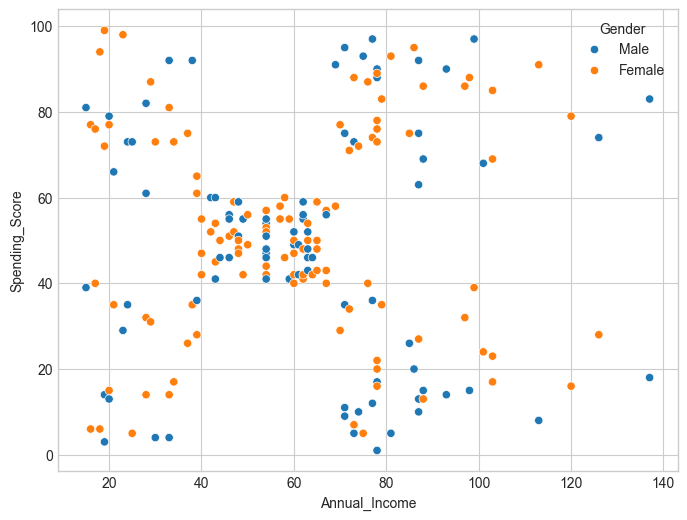

In [63]:
# Scatter Plot de Renda Anual vs. Score de Gastos
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual_Income', y='Spending_Score', data=df, hue='Gender')
#plt.title('Renda Anual vs. Score de Gastos')
plt.show()

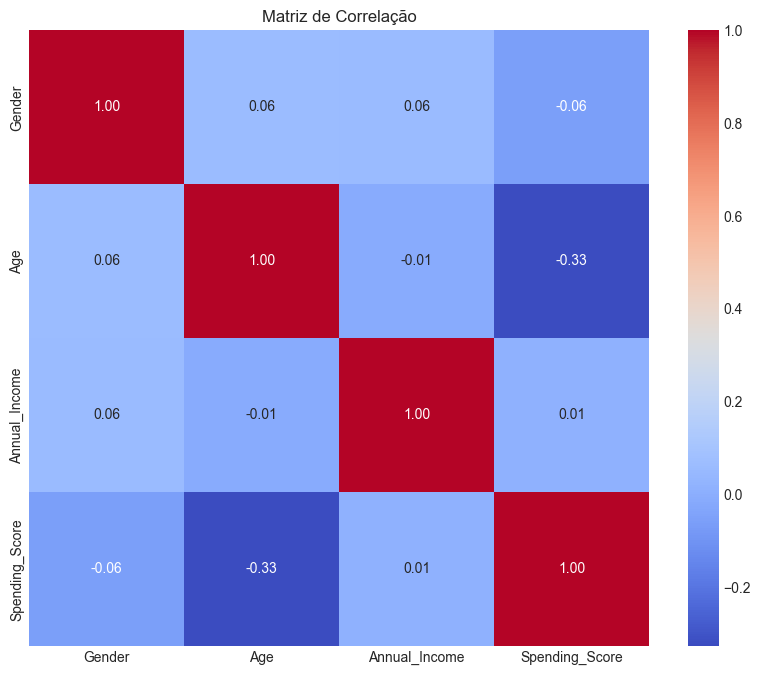

In [59]:
# Matriz de Correlação
df_encoded = df.copy()
df_encoded['Gender'] = df_encoded['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
numeric_df_encoded = df_encoded.drop('CustomerID', axis=1)
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()


# # Clusterização

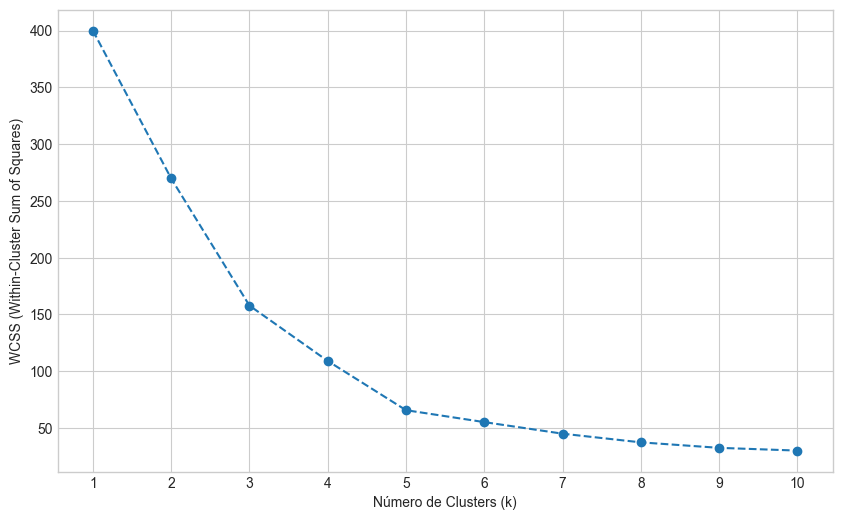

In [64]:
X = df[['Annual_Income', 'Spending_Score']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo (Elbow Method)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

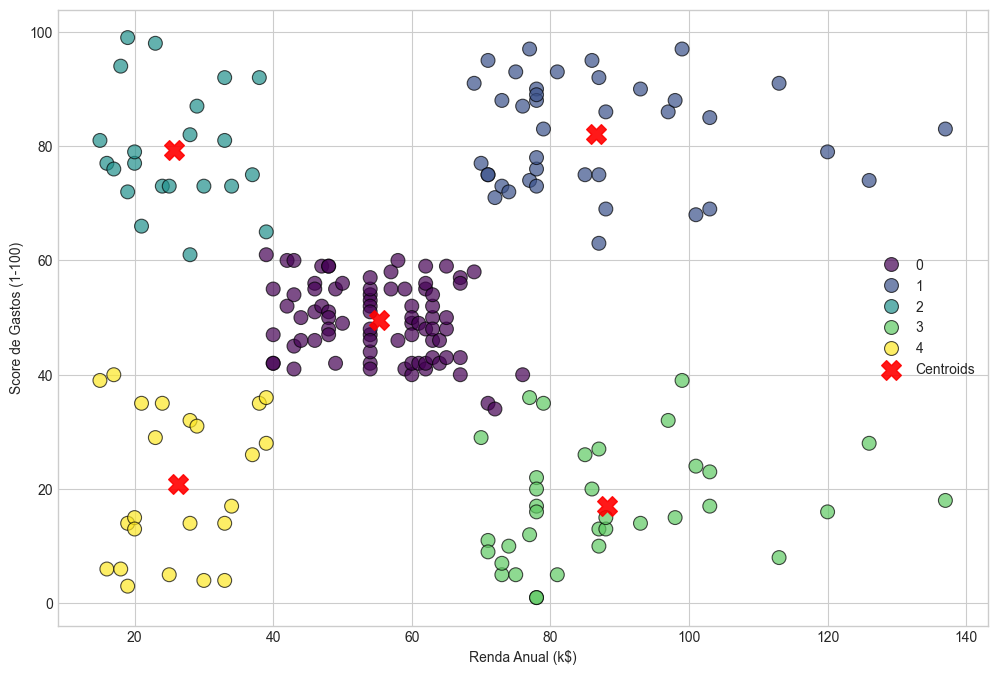

: 

In [ ]:
# Aplicando o K-Means com k=5
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Adicionando a informação do cluster ao DataFrame original
df['Cluster'] = y_kmeans

# Visualizando os clusters com os dados originais
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df['Annual_Income'], y=df['Spending_Score'], hue=df['Cluster'], palette='viridis', s=100, alpha=0.7, edgecolor='k')
# Invertendo a normalização para plotar os centróides originais
original_centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(original_centers[:, 0], original_centers[:, 1], c='red', s=200, alpha=0.9, marker='X', label='Centroids')
plt.title('Clusters de Clientes')
plt.xlabel('Renda Anual (k$)')
plt.ylabel('Score de Gastos (1-100)')
plt.legend()
plt.show()

In [62]:
# Analisando as médias dos clusters
print("\nAnálise dos Clusters (Médias por Cluster):")
print(df.groupby('Cluster')[['Age', 'Annual_Income', 'Spending_Score']].mean())


Análise dos Clusters (Médias por Cluster):
               Age  Annual_Income  Spending_Score
Cluster                                          
0        42.716049      55.296296       49.518519
1        32.692308      86.538462       82.128205
2        25.272727      25.727273       79.363636
3        41.114286      88.200000       17.114286
4        45.217391      26.304348       20.913043
